In [1]:
from simulations.elastic_collisions import Body, HiddenVariables, Variables, ElasticCollisionSimulation
import torch
from torch import Tensor
from torch.distributions import Distribution
from typing import Union, Callable

### The n-body collision problem

##### Visualise n body collision scenes for different bodies

#### Scenario 1 - Assumptions: 
- No force field (i.e. no air drag, attraction forces between bodies etc.)
- bodies are points of mass (a 'radius' value sets a range in which two close points are assumed to have collided)
- collisions are elastic (no loss of energy)
- the 'radius' values are the same and constant for each body
- the masses are the same and constant for each body 
- collisions with borders are also elastic
- the initial positions are fixed 

**Hidden variables:** initial velocity vectors

In [2]:

total_time = 10.0 
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius
velocity_distribution = torch.distributions.Uniform(low=-4, high=4)
position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)

num_bodies = 4
VARIABLES = Variables(
    masses = torch.full((num_bodies,), constant_mass_value),
    radii = torch.full((num_bodies,), constant_radius_value),
    starting_positions = None,
    initial_velocities= None,
    acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
    num_bodies = num_bodies,
    space_size = torch.tensor([space_size, space_size]),
)

initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
VARIABLES.starting_positions = initial_positions
print(f"initial_positions: {initial_positions}")

initial_velocities = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))
print(f"initial_velocities: {initial_velocities}")


simulation = ElasticCollisionSimulation( variables=VARIABLES, 
                                         enable_logging=False, 
                                         noise=False)

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)

result = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                             total_time=total_time, \
                             dt=dt)

position_history = simulation.get_position_history()
velocity_history = simulation.get_velocity_history()

print(f"position_history: {position_history}")

# assume that position history is of length num_bodies 
assert len(position_history) == num_bodies
assert len(velocity_history) == num_bodies

# print position histories for body 1 
print(f"position_history for body 1: {position_history[0]}")
print(f"time history for body 1: {len(position_history[0])}")

# Transform the history so that each element represents a timestep
position_history_by_timestep = list(map(list, zip(*position_history)))
velocity_history_by_timestep = list(map(list, zip(*velocity_history)))

num_timesteps = len(position_history_by_timestep)

print(f"position_history_by_timestep: {position_history_by_timestep}")

# Assume that position history is of length num_timesteps
assert len(position_history_by_timestep) == num_timesteps
assert len(velocity_history_by_timestep) == num_timesteps

# Print position histories for timestep 1
print(f"position_history for timestep 1: {position_history_by_timestep[0]}")
print(f"velocity_history for timestep 1: {velocity_history_by_timestep[0]}")

print(f"position of body 1 at timestep 1: {position_history_by_timestep[0][0]}")
print(f"velocity of body 1 at timestep 1: {velocity_history_by_timestep[0][0]}")



initial_positions: tensor([[6.4804, 6.7131],
        [3.0427, 4.2580],
        [8.7649, 5.0716],
        [2.1793, 1.2160]])
initial_velocities: tensor([[-3.3298, -3.7943],
        [-3.1270,  1.9379],
        [-1.5128,  0.7586],
        [ 3.9694,  3.9731]])


position_history: [[tensor([6.1474, 6.3337]), tensor([5.8144, 5.9542]), tensor([5.4815, 5.5748]), tensor([5.1485, 5.1954]), tensor([4.8155, 4.8160]), tensor([4.8594, 5.3698]), tensor([4.8985, 5.9117]), tensor([4.9375, 6.4535]), tensor([4.9766, 6.9954]), tensor([5.0157, 7.5372]), tensor([5.0547, 8.0790]), tensor([5.0938, 8.6209]), tensor([5.1328, 9.1627]), tensor([5.1719, 8.6209]), tensor([5.2110, 8.0790]), tensor([5.2500, 7.5372]), tensor([5.1351, 7.6521]), tensor([5.1232, 7.7619]), tensor([5.0144, 7.8647]), tensor([4.9974, 7.9705]), tensor([4.8838, 8.0748]), tensor([4.9467, 8.6057]), tensor([4.7638, 9.0831]), tensor([4.7452, 8.5497]), tensor([4.8283, 8.6345]), tensor([4.8159, 8.7199]), tensor([4.8940, 8.7990]), tensor([4.8778, 8.8865]), tensor([4.9520, 8.9629]), tensor([4.9402, 9.0406]), tensor([4.9857, 8.9575]), tensor([4.9925, 8.8687]), tensor([5.0344, 8.7866]), tensor([5.0382, 8.6966]), tensor([5.0768, 8.6153]), tensor([5.0780, 8.5239]), tensor([5.1136, 8.4432]), tensor([5.1125, 8.

In [3]:
# added collision history 

collision_history_by_timestep = simulation.get_collision_history_per_timestep()

In [4]:
# loop though collision history by timestep and print out the collision history
for timestep, collisions in collision_history_by_timestep.items():
    print(f"timestep {timestep}:")
    for collision in collisions:

        # if there is key "boundary" then use that instead of body2 
        if "boundary" in collision:
            print(f"collision at time {collision['time']}: body {collision['body1']} and boundary {collision['boundary']}")
        else:
            print(f"collision at time {collision['time']}: body {collision['body1']} and body {collision['body2']}")

timestep 0:
timestep 1:
timestep 2:
timestep 3:
timestep 4:
timestep 5:
collision at time 0.5: body 0 and body 3
timestep 6:
timestep 7:
collision at time 0.7000000000000001: body 1 and boundary 0
timestep 8:
timestep 9:
timestep 10:
collision at time 1.0: body 3 and boundary 1
timestep 11:
timestep 12:
timestep 13:
collision at time 1.3: body 0 and boundary 1
timestep 14:
timestep 15:
timestep 16:
collision at time 1.6: body 0 and body 1
collision at time 1.6: body 0 and body 2
timestep 17:
collision at time 1.7000000000000002: body 0 and body 1
timestep 18:
collision at time 1.8: body 0 and body 1
timestep 19:
collision at time 1.9000000000000001: body 0 and body 1
timestep 20:
collision at time 2.0: body 0 and body 1
timestep 21:
collision at time 2.1: body 0 and body 1
collision at time 2.1: body 0 and body 3
timestep 22:
collision at time 2.2: body 0 and body 1
timestep 23:
collision at time 2.3000000000000003: body 0 and body 1
collision at time 2.3000000000000003: body 0 and bou

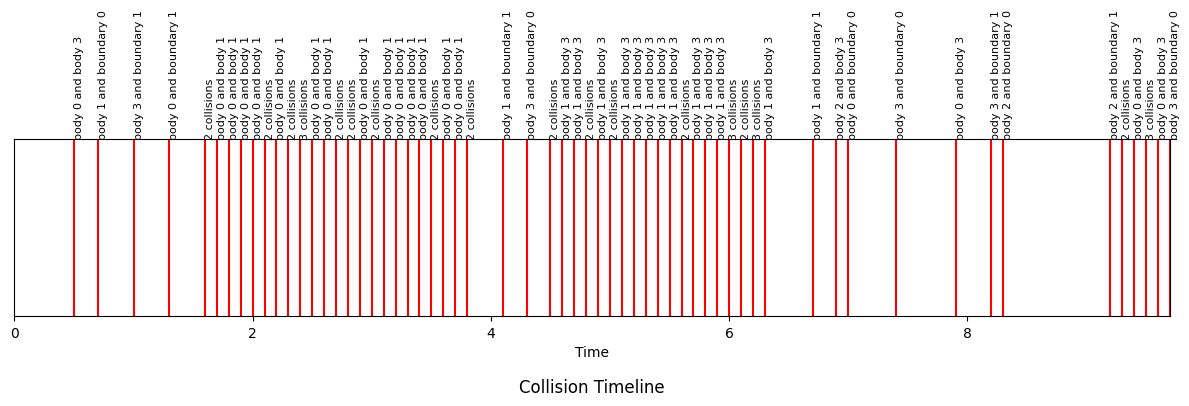

In [5]:
import matplotlib.pyplot as plt

# Get the total time span
total_time = max(collision['time'] for collisions in collision_history_by_timestep.values() for collision in collisions)

# Create a new figure
plt.figure(figsize=(12, 5))

# Loop through collision history by timestep
for timestep, collisions in collision_history_by_timestep.items():
    
    if len(collisions) == 1:
        collision = collisions[0]
        
        # Draw a vertical line at the time of the collision
        plt.vlines(collision['time'], 0, 1, colors='r')

        # Annotate the collision with smaller font size
        if "boundary" in collision:
            plt.text(collision['time'], 1, f"body {collision['body1']} and boundary {collision['boundary']}", rotation=90, verticalalignment='bottom', fontsize=8)
        else:
            plt.text(collision['time'], 1, f"body {collision['body1']} and body {collision['body2']}", rotation=90, verticalalignment='bottom', fontsize=8)
    elif len(collisions) > 1:
        collision = collisions[0]

        plt.vlines(collision['time'], 0, 1, colors='r')
        plt.text(collision['time'], 1, f"{len(collisions)} collisions", rotation=90, verticalalignment='bottom', fontsize=8)


# Set the limits and labels
plt.xlim(0, total_time)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.yticks([])
ax = plt.gca()  # get current axes
ax.text(0.5, -0.4, 'Collision Timeline', ha='center', va='center', transform=ax.transAxes, fontsize=12)


# Show the plot
plt.tight_layout()
plt.savefig('collision_timeline.png')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_timestep(ax, positions, velocities, space_size, max_radius):
    # Normalize the velocity vectors
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    # Set the limits of the plot
    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Add a grid
    ax.grid(True)

    # Convert positions list to numpy array
    positions = np.array(positions)

    # Plot the positions of the bodies
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    # Add transparent circles at the location of each body
    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    # Plot the normalized velocities as vectors and display the original velocity values
    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=40)

# Number of timesteps to plot
num_timesteps = 40

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(8, 5, figsize=(80, 120))  # 5 rows, 8 columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over the timesteps
for i in range(num_timesteps):
    # Get the positions and velocities for this timestep
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]

    # Plot this timestep
    plot_timestep(axs[i], positions, velocities, space_size, max_radius)
    axs[i].set_title(f'Timestep {i}', fontsize=46)


# Adjust the space between subplots to be minimal
#plt.subplots_adjust(wspace=0.01, hspace=0.1)
# Display the plot
plt.tight_layout()
plt.show()
    #

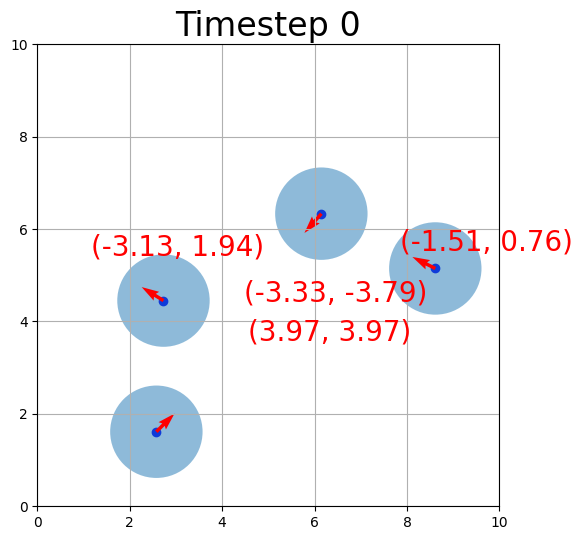

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numpy as np

def plot_timestep(i):
    ax.clear()
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])
    ax.set_aspect('equal')
    ax.grid(True)

    positions = np.array(positions)
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=20)

    ax.set_title(f'Timestep {i}', fontsize=24)

num_timesteps = 100
fig, ax = plt.subplots(figsize=(10, 6))

ani = animation.FuncAnimation(fig, plot_timestep, frames=num_timesteps, interval=200)
# Save the animation as a GIF
ani.save('animation.gif', writer=PillowWriter(fps=10))

In [8]:

position_history = simulation.get_position_history()
position_history_by_timestep_list = list(map(list, zip(*position_history)))
#position_history_by_timestep_list = list(map(list, zip(*position_history)))
print(position_history_by_timestep_list)
print(len(position_history_by_timestep_list))


[[tensor([6.1474, 6.3337]), tensor([2.7300, 4.4518]), tensor([8.6137, 5.1475]), tensor([2.5762, 1.6134])], [tensor([5.8144, 5.9542]), tensor([2.4173, 4.6456]), tensor([8.4624, 5.2233]), tensor([2.9731, 2.0107])], [tensor([5.4815, 5.5748]), tensor([2.1046, 4.8394]), tensor([8.3111, 5.2992]), tensor([3.3701, 2.4080])], [tensor([5.1485, 5.1954]), tensor([1.7919, 5.0331]), tensor([8.1598, 5.3750]), tensor([3.7670, 2.8053])], [tensor([4.8155, 4.8160]), tensor([1.4792, 5.2269]), tensor([8.0085, 5.4509]), tensor([4.1640, 3.2026])], [tensor([4.8594, 5.3698]), tensor([1.1665, 5.4207]), tensor([7.8572, 5.5267]), tensor([4.1840, 2.6666])], [tensor([4.8985, 5.9117]), tensor([0.8538, 5.6145]), tensor([7.7059, 5.6026]), tensor([4.2089, 2.1426])], [tensor([4.9375, 6.4535]), tensor([1.1665, 5.8083]), tensor([7.5547, 5.6785]), tensor([4.2338, 1.6187])], [tensor([4.9766, 6.9954]), tensor([1.4792, 6.0021]), tensor([7.4034, 5.7543]), tensor([4.2587, 1.0947])], [tensor([5.0157, 7.5372]), tensor([1.7919, 6.

In [9]:

t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
result = torch.stack(t_tensor_list, dim=0)
print(result.shape)
print(result)

torch.Size([100, 8])
tensor([[6.1474, 6.3337, 2.7300, 4.4518, 8.6137, 5.1475, 2.5762, 1.6134],
        [5.8144, 5.9542, 2.4173, 4.6456, 8.4624, 5.2233, 2.9731, 2.0107],
        [5.4815, 5.5748, 2.1046, 4.8394, 8.3111, 5.2992, 3.3701, 2.4080],
        [5.1485, 5.1954, 1.7919, 5.0331, 8.1598, 5.3750, 3.7670, 2.8053],
        [4.8155, 4.8160, 1.4792, 5.2269, 8.0085, 5.4509, 4.1640, 3.2026],
        [4.8594, 5.3698, 1.1665, 5.4207, 7.8572, 5.5267, 4.1840, 2.6666],
        [4.8985, 5.9117, 0.8538, 5.6145, 7.7059, 5.6026, 4.2089, 2.1426],
        [4.9375, 6.4535, 1.1665, 5.8083, 7.5547, 5.6785, 4.2338, 1.6187],
        [4.9766, 6.9954, 1.4792, 6.0021, 7.4034, 5.7543, 4.2587, 1.0947],
        [5.0157, 7.5372, 1.7919, 6.1959, 7.2521, 5.8302, 4.2836, 0.5708],
        [5.0547, 8.0790, 2.1046, 6.3897, 7.1008, 5.9060, 4.3085, 1.0947],
        [5.0938, 8.6209, 2.4173, 6.5835, 6.9495, 5.9819, 4.3334, 1.6187],
        [5.1328, 9.1627, 2.7300, 6.7772, 6.7982, 6.0577, 4.3583, 2.1426],
        [5.1719, 

In [10]:
import torch
import torch

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)


labels = ["num_bodies", "masses", "radii", "acceleration_coefficients", "initial_v"]

def prior_fn_basic(n_samples: int = 1) -> torch.Tensor:
    constant_mass_value = 1.0
    constant_radius_value = max_radius
    acceleration_coefficient_value = 0.0
    velocity_distribution = torch.distributions.Uniform(low=-4, high=4)

    num_bodies = torch.tensor(2)
    masses = torch.full((num_bodies,), constant_mass_value)
    radii = torch.full((num_bodies,), constant_radius_value)
    a_coeffs = torch.full((num_bodies,), acceleration_coefficient_value)
    initial_v = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))


    flattened_tensors = torch.cat([torch.flatten(num_bodies),
                                   torch.flatten(masses),
                                   torch.flatten(radii),
                                   torch.flatten(a_coeffs),
                                   torch.flatten(initial_v)], dim=0)
    
    # concatenate flattened tensors n_samples times
    return torch.stack([flattened_tensors for _ in range(n_samples)], dim=0)


In [11]:

# prior and simulation interfaces
class Prior:
    def __init__(self, prior_fn, labels):
        self.prior_fn = prior_fn
        self.labels = labels
        self.mean = None
        self.std = None
        
    def sample(self, num_samples: int = 1) -> torch.Tensor:
        samples = self.prior_fn(num_samples)
        self.mean = torch.mean(samples)
        self.std = torch.std(samples)
        return samples
        
    def get_stats(self):
        if self.mean is None and self.std is None:
            raise ValueError("Sample first before getting stats")
        else:
            return self.mean, self.std
    
    def get_labels(self):
        return self.labels

In [12]:
basic_prior = Prior(prior_fn_basic, labels)
some_X = basic_prior.sample(1)
print(f"some_X: {some_X}")

some_X: tensor([[ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000, -3.4717,
          2.9004,  0.6260,  0.9055]])


In [13]:
import torch
import torch
# data set creation 
# X - input data - position histories by timestep 
# Y - ouput data - hidden varriables 


def simulate_collisions_simple(Y_i, vars, total_time, dt):

    position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)
    HIDDENVARIABLES = HiddenVariables.from_tensor(Y_i)

    initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(vars, position_distribution)
    vars.starting_positions = initial_positions

    simulation = ElasticCollisionSimulation(variables=vars, 
                                            enable_logging=False, 
                                            noise=False)

    _ = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                            total_time=total_time, \
                            dt=dt)
    
    position_history = simulation.get_position_history()    
    position_history_by_timestep_list = list(map(list, zip(*position_history)))
    t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
    return torch.stack(t_tensor_list, dim=0)

    
# Generate a simulated training dataset using the SIR model and prior distribution
def generate_training_data(num_samples, vars, total_time,dt, prior):

    Y = prior.sample(num_samples)

    X = []
    for i in range(num_samples):
        # access entries in Y torch tensor along the -1th dimension
        Y_i = Y[i]

        # -------- create X values using the simulation function 
        X_i = simulate_collisions_simple(Y_i, vars, total_time, dt)
        X.append(X_i.flatten())

    # X is a list of tensors, convert to a single tensor
    X = torch.stack(X, dim=0)
    return X, Y



In [14]:
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [15]:
""" X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)
print(f"X_train shape: {X_train.shape}")
print(f"X_train: {X_train}") """

' X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)\nprint(f"X_train shape: {X_train.shape}")\nprint(f"X_train: {X_train}") '

In [16]:
""" print(f"Y_train shape: {Y_train.shape}")
print(f"Y_train: {Y_train}") """

' print(f"Y_train shape: {Y_train.shape}")\nprint(f"Y_train: {Y_train}") '

#### Training simple feed-forward predictor model

In [17]:
from torch import nn

# Define the neural network architecture
# simple feed forward fully connected neural network with num_l_layers
class ParameterPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_l_layers: int = 1):
        super(ParameterPredictor, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1_s = self._build_fc_linear_layers(input_size, hidden_size, num_l_layers)
        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, 11)  # Output layer with 11 neurons for the output values

    def _build_fc_linear_layers(self, input_size, hidden_size, num_layers):
        layers = []
        if num_layers == 0:
            raise ValueError("num_layers must be greater than 0")
        elif num_layers == 1:
            return [nn.Linear(input_size, hidden_size)]
        elif num_layers > 1:
            return [nn.Linear(input_size, hidden_size)] + [nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)]
        return layers

    def forward(self, x):
        #print(f"1: x shape: {x.shape}")
        x = self.flatten(x)
        #print(f"2: x shape: {x.shape}")
        for layer in self.fc1_s:
            temp_x = layer(x)
            #print(f"3: x shape: {x.shape}")
            x = self.relu(temp_x)
        #x = self.relu(x)
        x = self.fc2(x)
        return x
    

class SummaryNetwork(ParameterPredictor):
    def __init__(self, input_size, hidden_size, num_l_layers: int = 1):
        super().__init__(input_size, hidden_size, num_l_layers)
        # Remove the fc2 layer
        del self.fc2

    def forward(self, x):
        x = self.flatten(x)
        for layer in self.fc1_s:
            x = self.relu(layer(x))
        return x

In [18]:
total_time = 10.0 
NUM_bodies = 2
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius


VARIABLES = Variables(
        masses = torch.full((NUM_bodies,), constant_mass_value),
        radii = torch.full((NUM_bodies,), constant_radius_value),
        starting_positions = None,
        initial_velocities= None,
        acceleration_coefficients = torch.full((NUM_bodies,), acceleration_coefficient_value),
        num_bodies = NUM_bodies,
        space_size = torch.tensor([space_size, space_size]),
    )

In [19]:
# Define the number of training and test samples
num_train_samples = 80  # Adjust as needed
num_test_samples = 20   # Adjust as needed


# Generate training data
prior = Prior(prior_fn_basic, labels)
X_train, Y_train = generate_training_data(num_train_samples, VARIABLES, total_time,dt, prior)
# Generate test data
X_test, Y_test = generate_training_data(num_test_samples, VARIABLES, total_time, dt, prior)


print("Y_train shape:", Y_train.shape)
print("X_train shape:", X_train.shape)


print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: torch.Size([80, 11])
X_train shape: torch.Size([80, 400])
X_test shape: torch.Size([20, 400])
Y_test shape: torch.Size([20, 11])


In [20]:
def train_model(model, optimizer, criterion, num_samples, num_epochs, batch_size):
    
    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            inputs = X_train[i:i+batch_size]
            labels = Y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

In [21]:
from torch import optim

# Training loop
num_samples = 80
num_epochs = 100
batch_size = 20
num_timesteps = 100
input_size = num_timesteps * NUM_bodies * 2
hidden_size = 64


# Define the loss function and optimizer

model = ParameterPredictor(input_size, hidden_size, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, optimizer, criterion, num_samples, num_epochs, batch_size)


with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)

print(f"Test loss: {test_loss.item()}")

Epoch [1/100], Loss: 4.460601329803467
Epoch [2/100], Loss: 4.207314968109131
Epoch [3/100], Loss: 3.9876434803009033
Epoch [4/100], Loss: 3.797632932662964
Epoch [5/100], Loss: 3.6331872940063477
Epoch [6/100], Loss: 3.491680860519409
Epoch [7/100], Loss: 3.3714447021484375
Epoch [8/100], Loss: 3.2705583572387695
Epoch [9/100], Loss: 3.1864681243896484
Epoch [10/100], Loss: 3.1164112091064453
Epoch [11/100], Loss: 3.0579488277435303
Epoch [12/100], Loss: 3.0091073513031006
Epoch [13/100], Loss: 2.968240737915039
Epoch [14/100], Loss: 2.933898448944092
Epoch [15/100], Loss: 2.9048068523406982
Epoch [16/100], Loss: 2.879875898361206
Epoch [17/100], Loss: 2.858187675476074
Epoch [18/100], Loss: 2.8389787673950195
Epoch [19/100], Loss: 2.8216397762298584
Epoch [20/100], Loss: 2.80570650100708
Epoch [21/100], Loss: 2.7908337116241455
Epoch [22/100], Loss: 2.776768922805786
Epoch [23/100], Loss: 2.763331651687622
Epoch [24/100], Loss: 2.750394344329834
Epoch [25/100], Loss: 2.73786067962646

In [22]:
"""
# Lists to store results
hidden_sizes = [32, 64,128]  # Vary hidden layer size
train_set_sizes = [500, 1000, 2000]  # Vary training set size
accuracies = []

# Training loop
for hidden_size in hidden_sizes:
    for train_set_size in train_set_sizes:
        model = ParameterPredictor(input_size, hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)

        num_epochs = 50
        batch_size = 32
        losses = []

        for epoch in range(num_epochs):
            for i in range(0, train_set_size, batch_size):
                inputs = X_train[i:i+batch_size]
                labels = Y_train[i:i+batch_size]

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            losses.append(loss.item())

        # Evaluate the model on a simulated test set (similar to training data generation)
        X_test, Y_test = generate_training_data(num_samples, T, prior_distribution)
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, Y_test)

        
        accuracies.append(test_loss.item())

# Create a heatmap of accuracies
accuracies = np.array(accuracies).reshape(len(hidden_sizes), len(train_set_sizes))
plt.figure(figsize=(10, 6))
plt.imshow(accuracies, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Test Loss')
plt.xticks(np.arange(len(train_set_sizes)), train_set_sizes)
plt.yticks(np.arange(len(hidden_sizes)), hidden_sizes)
plt.xlabel('Training Set Size')
plt.ylabel('Hidden Layer Size')
plt.title('Accuracy Heatmap')
plt.show()
"""

"\n# Lists to store results\nhidden_sizes = [32, 64,128]  # Vary hidden layer size\ntrain_set_sizes = [500, 1000, 2000]  # Vary training set size\naccuracies = []\n\n# Training loop\nfor hidden_size in hidden_sizes:\n    for train_set_size in train_set_sizes:\n        model = ParameterPredictor(input_size, hidden_size)\n        optimizer = optim.Adam(model.parameters(), lr=0.001)\n\n        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)\n\n        num_epochs = 50\n        batch_size = 32\n        losses = []\n\n        for epoch in range(num_epochs):\n            for i in range(0, train_set_size, batch_size):\n                inputs = X_train[i:i+batch_size]\n                labels = Y_train[i:i+batch_size]\n\n                optimizer.zero_grad()\n                outputs = model(inputs)\n                loss = criterion(outputs, labels)\n                loss.backward()\n                optimizer.step()\n\n            losses.append(loss.item())\n\n    

### Conditional Real NVP

In [23]:
import torch.nn.functional as F
import numpy as np
import math

def subnet_constructor(input_size, hidden_size, output_size):
    model = nn.Sequential(
                        nn.Linear(input_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, output_size)
                        )
    return model

class CouplingBlock(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super(CouplingBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.condition_size = condition_size
        self.split1 = math.floor(self.input_size/2)
        self.split2 = self.input_size - self.split1
        self.subnet = subnet_constructor(self.split1 + self.condition_size, self.hidden_size, 2*self.split2)
        

    def forward(self, x, cond):
        x1, x2 = x[..., :self.split1], x[..., self.split1:]
        params = self.subnet(torch.cat([x1, cond], -1))
        s, t = params[...,:self.split2], params[...,self.split2:]
        s = torch.tanh(s)
        ljd = torch.sum(s, -1)

        s = torch.exp(s)
        x2 = s*x2 + t
        return torch.cat([x1,x2], -1), ljd
        

    def inverse(self, y, cond):
        x1, x2 = y[..., :self.split1], y[..., self.split1:]
        params = self.subnet(torch.cat([x1, cond], -1))
        s, t = params[...,:self.split2], params[...,self.split2:]
        s = torch.tanh(s)
        ljd = torch.sum(s, -1)

        s = torch.exp(-s)
        x2 = s * (x2-t)
        return torch.cat([x1,x2], -1)

class ConditionalRealNVP(nn.Module):
    def __init__(self, input_size, hidden_size, blocks, condition_size):
        super(ConditionalRealNVP, self).__init__()
        self.blocks = nn.ModuleList([CouplingBlock(input_size, hidden_size, condition_size) for _ in range(blocks)])
        self.orthogonal_matrices = [torch.from_numpy(np.linalg.qr(np.random.randn(input_size, input_size))[0]).float() for _ in range(blocks - 1)]

    def forward(self, x, condition):
        log_det_jacobian = 0
        for i, block in enumerate(self.blocks):
            x, log_det_j = block(x, condition)
            log_det_jacobian += log_det_j
            if i != len(self.blocks) - 1:
                x = torch.matmul(x, self.orthogonal_matrices[i]) # changed from torch.mm to torch.matmul
        return x, log_det_jacobian

    def inverse(self, y, condition):
        for i, block in reversed(list(enumerate(self.blocks))):
            if i != len(self.blocks) - 1:
                y = torch.matmul(y, self.orthogonal_matrices[i].inverse()) # changed from torch.mm to torch.matmul
            y = block.inverse(y, condition)
        return y

    def loss_function(self, z, log_det_jacobians):
        log_likelihood = -0.5 * torch.sum(z**2, dim=-1) - 0.5 * np.log(2 * np.pi) * z.size(1) # changed from dim=1 to dim=-1
        return -(log_likelihood + log_det_jacobians).mean()

In [24]:
import torch
import torch.nn as nn
from tqdm import tqdm

def train_INN(data_loader, inference_network, summary_network, optimizer, train_config):
    noise = train_config.get('added_noise', 0.0)
    loss_history = {'train': [], 'validation': []}
    epochs = train_config['epochs']

    for epoch in range(epochs):
        inference_network.train()
        summary_network.train()
        total_loss = 0.0
        
        for sim_data, params_data in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            sim_data = sim_data.to(train_config["device"])
            params_data = params_data.to(train_config["device"])

            # Add noise to the parameters data
            p_noise = params_data + torch.randn_like(params_data) * noise

            # Forward pass
            summary_stats = summary_network(sim_data)
            z, log_det_jacobians = inference_network(p_noise, summary_stats)
            
            # Calculate loss
            loss = inference_network.loss_function(z, log_det_jacobians)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average loss for the epoch
        average_loss = total_loss / len(data_loader)
        loss_history['train'].append(average_loss)

        # Validation loss
        with torch.no_grad():
            inference_network.eval()
            summary_network.eval()
            total_val_loss = 0.0
            for sim_data, params_data in data_loader:
                sim_data = sim_data.to(train_config["device"])
                params_data = params_data.to(train_config["device"])
                vp_noise = params_data + torch.randn_like(params_data) * noise
                v_summary_stats = summary_network(sim_data)
                v_z, v_log_det_jacobians = inference_network(vp_noise, v_summary_stats)
                v_loss = inference_network.loss_function(v_z, v_log_det_jacobians)
                total_val_loss += v_loss.item()
            average_val_loss = total_val_loss / len(data_loader)
            loss_history['validation'].append(average_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {average_loss}, Validation Loss: {average_val_loss}")

    return loss_history

In [25]:
dataset = MyDataset(X_train, Y_train)
batch_size = 10  # Define your desired batch size
shuffle = True  # Set to True if you want to shuffle the data
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [26]:
"""
# Training loop
num_samples = 80
num_epochs = 100
batch_size = 20
num_timesteps = 100
input_size = num_timesteps * NUM_bodies * 2
hidden_size = 64
"""

'\n# Training loop\nnum_samples = 80\nnum_epochs = 100\nbatch_size = 20\nnum_timesteps = 100\ninput_size = num_timesteps * NUM_bodies * 2\nhidden_size = 64\n'

In [27]:
model2 = SummaryNetwork(input_size, hidden_size, 1)

# Copy the weights
model2.flatten.load_state_dict(model.flatten.state_dict())
for layer2, layer1 in zip(model2.fc1_s, model.fc1_s):
    layer2.load_state_dict(layer1.state_dict())

In [29]:
# Assuming you have already imported the necessary libraries and defined your models

# summary network related configurations:
sn_hidden_size = 64
summary_network = model2
hidden_values_size = 11
#input_size = num_timesteps * NUM_bodies * 2




# conditional realnvp related configurations

coupling_layers = 2
realnvp_hidden_size = 64

inference_network = ConditionalRealNVP(input_size=hidden_values_size, 
                                       hidden_size=realnvp_hidden_size, 
                                       blocks=coupling_layers, 
                                       condition_size=sn_hidden_size)


# Step 3: Define Optimizer
optimizer = torch.optim.Adam(list(inference_network.parameters()) + list(summary_network.parameters()), lr=0.001)

# Step 4: Set Training Configurations
train_config = {
    'epochs': 10,
    'added_noise': 0.0,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
    # Add more configurations as needed
}

# Step 5: Call train_INN Function
loss_history = train_INN(data_loader, inference_network, summary_network, optimizer, train_config)


Epoch 1/10:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/10: 100%|██████████| 8/8 [00:00<00:00, 121.21it/s]


Epoch 1/10, Train Loss: 26.619338989257812, Validation Loss: 22.593379974365234


Epoch 2/10: 100%|██████████| 8/8 [00:00<00:00, 188.13it/s]


Epoch 2/10, Train Loss: 21.398261547088623, Validation Loss: 20.314654111862183


Epoch 3/10: 100%|██████████| 8/8 [00:00<00:00, 199.99it/s]


Epoch 3/10, Train Loss: 19.78995108604431, Validation Loss: 19.13301181793213


Epoch 4/10: 100%|██████████| 8/8 [00:00<00:00, 207.67it/s]


Epoch 4/10, Train Loss: 18.651660919189453, Validation Loss: 17.99931287765503


Epoch 5/10: 100%|██████████| 8/8 [00:00<00:00, 190.44it/s]


Epoch 5/10, Train Loss: 17.574987173080444, Validation Loss: 16.99835753440857


Epoch 6/10: 100%|██████████| 8/8 [00:00<00:00, 170.21it/s]


Epoch 6/10, Train Loss: 16.615375995635986, Validation Loss: 16.033210158348083


Epoch 7/10: 100%|██████████| 8/8 [00:00<00:00, 161.55it/s]


Epoch 7/10, Train Loss: 15.58583152294159, Validation Loss: 15.001437902450562


Epoch 8/10: 100%|██████████| 8/8 [00:00<00:00, 181.82it/s]

Epoch 8/10, Train Loss: 14.723752617835999, Validation Loss: 14.285898804664612

Epoch 9/10: 100%|██████████| 8/8 [00:00<00:00, 179.61it/s]


Epoch 9/10, Train Loss: 14.206376194953918, Validation Loss: 13.703448414802551


Epoch 10/10: 100%|██████████| 8/8 [00:00<00:00, 235.34it/s]


Epoch 10/10, Train Loss: 13.596205830574036, Validation Loss: 13.267843961715698
